In [1]:
#M4.4XLarge EC2
import pandas as pd
import numpy as np
import re
import string
import sys

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

from collections import Counter

%matplotlib inline
plt.style.use('ggplot')

In [2]:
projects = pd.read_csv('./opendata_projects.csv.gz') #878852 Entries
projects = projects.loc[(projects.funding_status == 'completed') | (projects.funding_status == 'expired')] #846164

In [3]:
# project_cols_subset = ['_projectid', '_teacher_acctid', '_schoolid', 
#                        'school_latitude', 'school_longitude', 
#                        'school_city', 'school_state', 'school_zip', 'school_metro',
#                        'school_charter', 'school_magnet', 'school_year_round',
#                        'school_nlns', 'school_kipp', 'school_charter_ready_promise',
#                        'teacher_prefix', 'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
#                        'primary_focus_subject', 'primary_focus_area',
#                        'secondary_focus_subject', 'secondary_focus_area',
#                        'resource_type', 'poverty_level', 'grade_level', 
#                        'total_price_excluding_optional_support', 'total_price_including_optional_support',
#                        'students_reached', 'total_donations', 'num_donors',
#                        'eligible_double_your_impact_match', 'eligible_almost_home_match', 'funding_status',
#                        'date_posted', 'date_completed', 'date_thank_you_packet_mailed'] #36 Columns

In [4]:
#Should generate time stamp as real date for visuals

#projects = projects[project_cols_subset]
projects.set_index('_projectid', inplace =True)
projects['Year'] = projects.date_posted.map(lambda d: d[:4]).astype('int') #Should be String but converting as Int for now
projects['Month'] = projects.date_posted.map(lambda d: d[5:7]).astype('int') #Should be String but converting as Int for now
projects.students_reached.fillna(value = projects.students_reached.median(), inplace = True)

In [5]:
#Convert DateTime strings to DateTime Format
for c in projects.columns:
    if 'date' in c:
        projects[c] = pd.to_datetime(projects[c], format="%Y-%m-%d %H:%M:%S")

In [6]:
#projects.head(100000).plot(x = 'school_latitude', y = 'school_longitude', kind='scatter', figsize = (15,10))

In [7]:
#date_gb = projects.groupby(['date_posted','funding_status']).count()

In [8]:
def plot_by_target(df = projects, x_var = 'date_posted', y_var = 'total_donations', agg_dict = None):
    '''
    Ideally agg will eventually be a list to aggregate by.
    '''
    if agg is None:
        agg_dict = {'num_donors':[np.count_nonzero]}
    
    df_gb = df.groupby([x_var, y_var]).agg(agg_dict)
    
    current_plot = (None, None, None)
    
    
    

In [9]:
projects.columns

Index([u'_teacher_acctid', u'_schoolid', u'school_ncesid', u'school_latitude',
       u'school_longitude', u'school_city', u'school_state', u'school_zip',
       u'school_metro', u'school_district', u'school_county',
       u'school_charter', u'school_magnet', u'school_year_round',
       u'school_nlns', u'school_kipp', u'school_charter_ready_promise',
       u'teacher_prefix', u'teacher_teach_for_america',
       u'teacher_ny_teaching_fellow', u'primary_focus_subject',
       u'primary_focus_area', u'secondary_focus_subject',
       u'secondary_focus_area', u'resource_type', u'poverty_level',
       u'grade_level', u'vendor_shipping_charges', u'sales_tax',
       u'payment_processing_charges', u'fulfillment_labor_materials',
       u'total_price_excluding_optional_support',
       u'total_price_including_optional_support', u'students_reached',
       u'total_donations', u'num_donors', u'eligible_double_your_impact_match',
       u'eligible_almost_home_match', u'funding_status', u'date

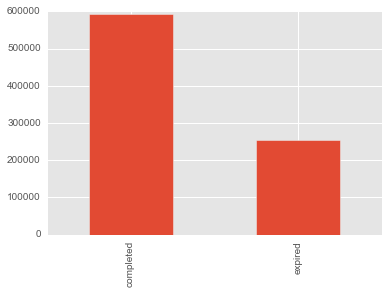

In [36]:
projects.funding_status.value_counts().plot(kind = 'bar')

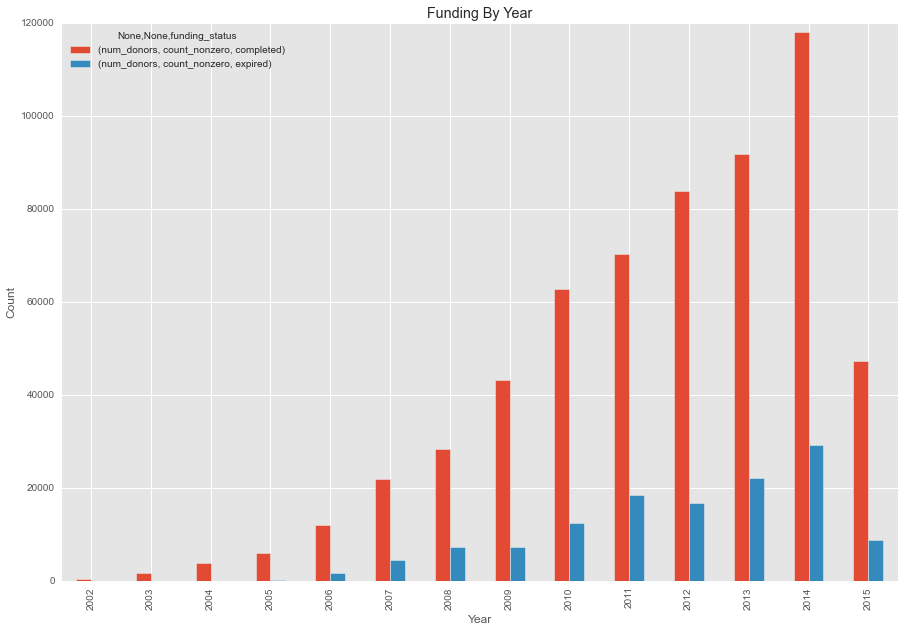

In [10]:
projects.groupby(['Year','funding_status']).agg({'num_donors':[np.count_nonzero]}).unstack().fillna(0) \
.plot(kind = 'bar', figsize=(15,10))
plt.title('Funding By Year')
plt.ylabel('Count')
#plt.legend()
plt.show()

In [11]:
p = projects.groupby(['Year','funding_status']).agg({'num_donors':[np.count_nonzero]}).unstack().fillna(0)
#.plot(kind = 'bar', figsize=(15,10))
p['Total'] = p.iloc[:,0] + p.iloc[:,1]
p['Completed Over Total'] = p.iloc[:,0]/ (p.iloc[:,0] + p.iloc[:,1]).astype('float')
p#['Completed Over Total'].plot(kind = 'bar')

num_donors           Total Completed Over Total
               count_nonzero                                     
funding_status     completed expired                             
Year                                                             
2002                     450       3     453             0.993377
2003                    1729       5    1734             0.997116
2004                    3950      10    3960             0.997475
2005                    6079     330    6409             0.948510
2006                   12061    1689   13750             0.877164
2007                   21899    4558   26457             0.827720
2008                   28360    7305   35665             0.795177
2009                   43195    7290   50485             0.855601
2010                   62886   12473   75359             0.834486
2011                   70293   18528   88821             0.791401
2012                   83981   16699  100680             0.834138
2013                   91882   22069  113951             0.806329
2014                  118003   29191  147194             0.801683
2015                   47335    8725   56060             0.844363

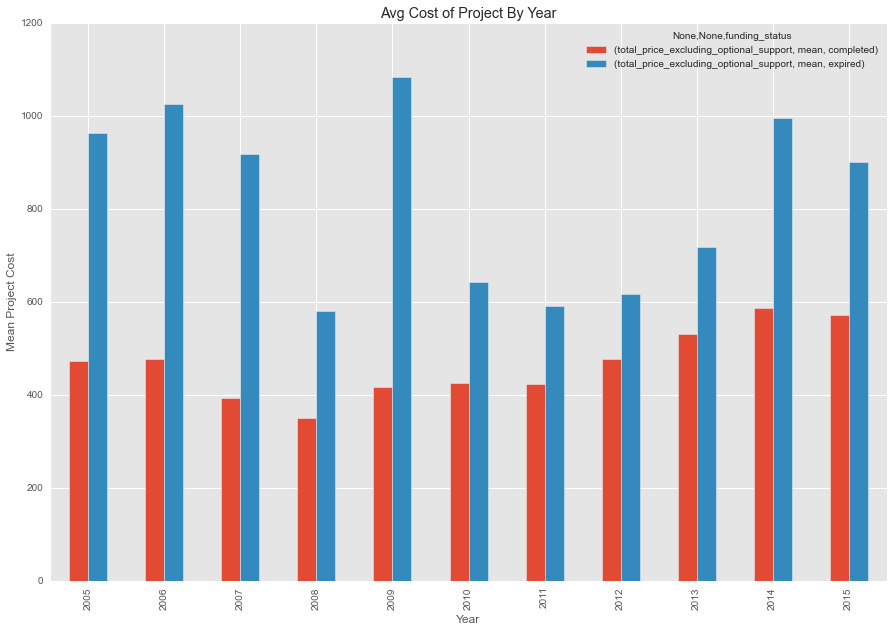

In [12]:
p = projects.groupby(['Year','funding_status']).agg({'total_price_excluding_optional_support':[np.mean]}).unstack().fillna(0)
p.iloc[3:,].plot(kind = 'bar', figsize=(15,10))
plt.title('Avg Cost of Project By Year')
plt.ylabel('Mean Project Cost')
#plt.legend()
#plt.show()

In [13]:
p['Expired Over Completed'] = p.iloc[:,1]/ p.iloc[:,0]
p#['Completed Over Total'].plot(kind = 'bar')

total_price_excluding_optional_support               \
                                                 mean                
funding_status                              completed      expired   
Year                                                                 
2002                                       629.775923   112.935000   
2003                                       465.543990  6302.826463   
2004                                       410.572906   614.323773   
2005                                       473.402628   963.540651   
2006                                       477.645292  1026.148746   
2007                                       393.978663   917.593011   
2008                                       350.132414   580.853517   
2009                                       417.044260  1085.031956   
2010                                       425.162057   642.989334   
2011                                       424.443690   591.043723   
2012                                       476.953973   617.049274   
2013                                       532.162755   718.964587   
2014                                       586.289171   996.051656   
2015                                       572.581624   900.982805   

               Expired Over Completed  
                                       
funding_status                         
Year                                   
2002                         0.179326  
2003                        13.538627  
2004                         1.496260  
2005                         2.035351  
2006                         2.148349  
2007                         2.329042  
2008                         1.658954  
2009                         2.601719  
2010                         1.512339  
2011                         1.392514  
2012                         1.293729  
2013                         1.351024  
2014                         1.698909  
2015                         1.573545

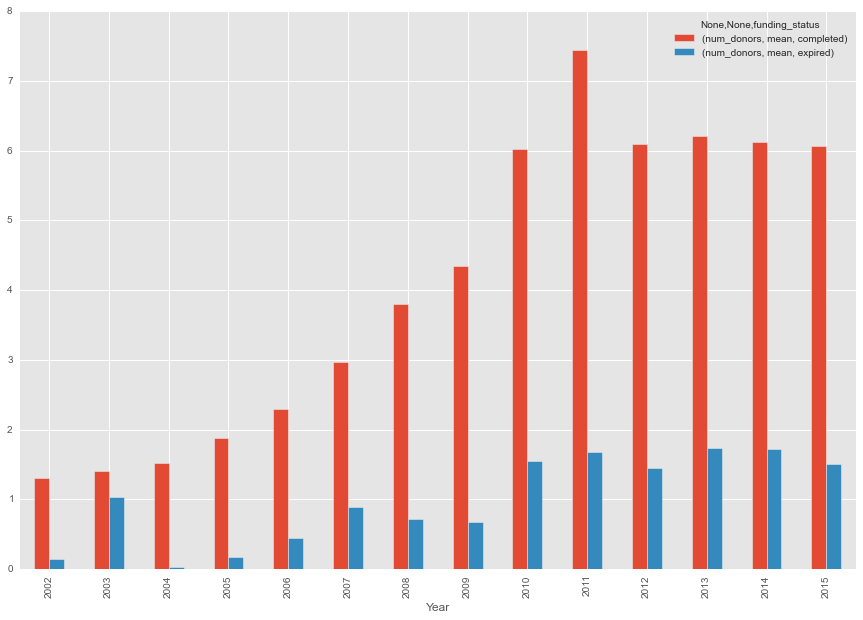

In [14]:
projects.groupby(['Year','funding_status']).agg({'num_donors':[np.mean]}).unstack().fillna(0)\
.plot(kind = 'bar', figsize=(15,10))


In [15]:
p = projects.groupby(['Month','funding_status']).agg({'num_donors':[np.count_nonzero]}).unstack().fillna(0)
#.plot(kind = 'bar', figsize=(15,10))
p['Total'] = p.iloc[:,0] + p.iloc[:,1]
p['Completed Over Total'] = p.iloc[:,0]/ (p.iloc[:,0] + p.iloc[:,1]).astype('float')
p#['Completed Over Total'].plot(kind = 'bar')

num_donors           Total Completed Over Total
               count_nonzero                                     
funding_status     completed expired                             
Month                                                            
1                      51863   12088   63951             0.810980
2                      45824   11581   57405             0.798258
3                      47280   11696   58976             0.801682
4                      34960    8567   43527             0.803180
5                      31116    6300   37416             0.831623
6                      26390    6459   32849             0.803373
7                      35304    8210   43514             0.811325
8                      67122   13017   80139             0.837570
9                      84433   16536  100969             0.836227
10                     66810   13719   80529             0.829639
11                     50905   10728   61633             0.825937
12                     50096    9974   60070             0.833960

In [16]:
date_gb = projects.groupby(['date_posted', 'funding_status']).agg({'num_donors':[np.count_nonzero, np.sum, np.median]})

In [17]:
date_gb.tail()

num_donors            
                           count_nonzero  sum median
date_posted funding_status                          
2015-08-15  expired                    0    0      0
2015-08-16  completed                 63  242      4
            expired                    0    0      0
2015-08-17  completed                 15   46      2
            expired                    0    0      0

In [18]:
type(date_gb)

pandas.core.frame.DataFrame

In [19]:
temp = date_gb.copy()#[['school_city']]

In [20]:
for_plot = temp.unstack().fillna(0)
for_plot.head()

num_donors                                            
               count_nonzero               sum            median        
funding_status     completed expired completed expired completed expired
date_posted                                                             
2002-09-13                 1       0         1       0       1.0       0
2002-09-16                 1       0         1       0       1.0       0
2002-09-17                26       0        29       0       1.0       0
2002-09-18                 2       0         3       0       1.5       0
2002-09-19                85       0       120       0       1.0       0

In [21]:
for c in for_plot.columns:
    print c

('num_donors', 'count_nonzero', 'completed')
('num_donors', 'count_nonzero', 'expired')
('num_donors', 'sum', 'completed')
('num_donors', 'sum', 'expired')
('num_donors', 'median', 'completed')
('num_donors', 'median', 'expired')


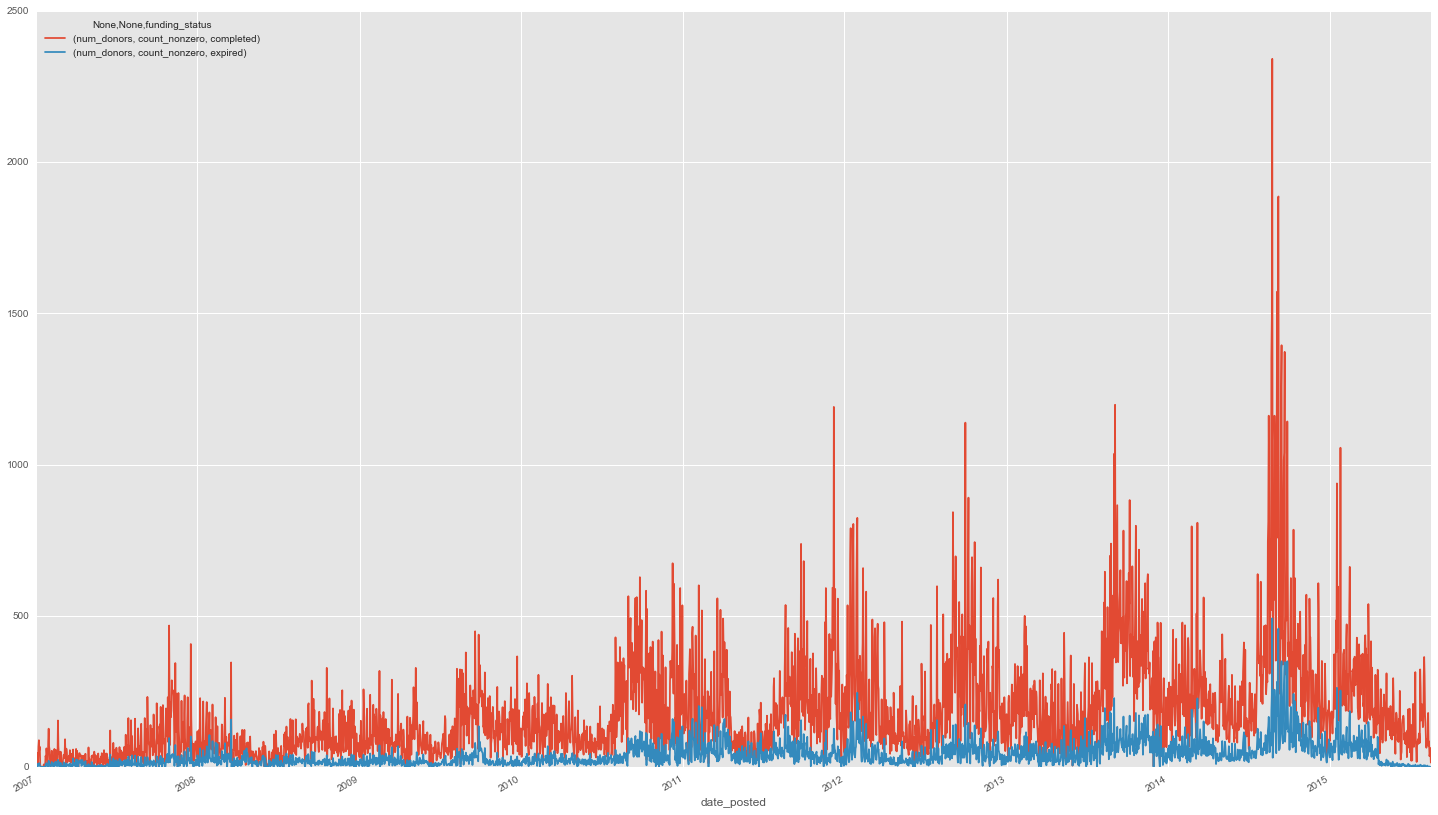

In [22]:
for_plot.loc['20070101':,[('num_donors', 'count_nonzero', 'completed'),('num_donors', 'count_nonzero', 'expired')]].plot(figsize = (25,15))

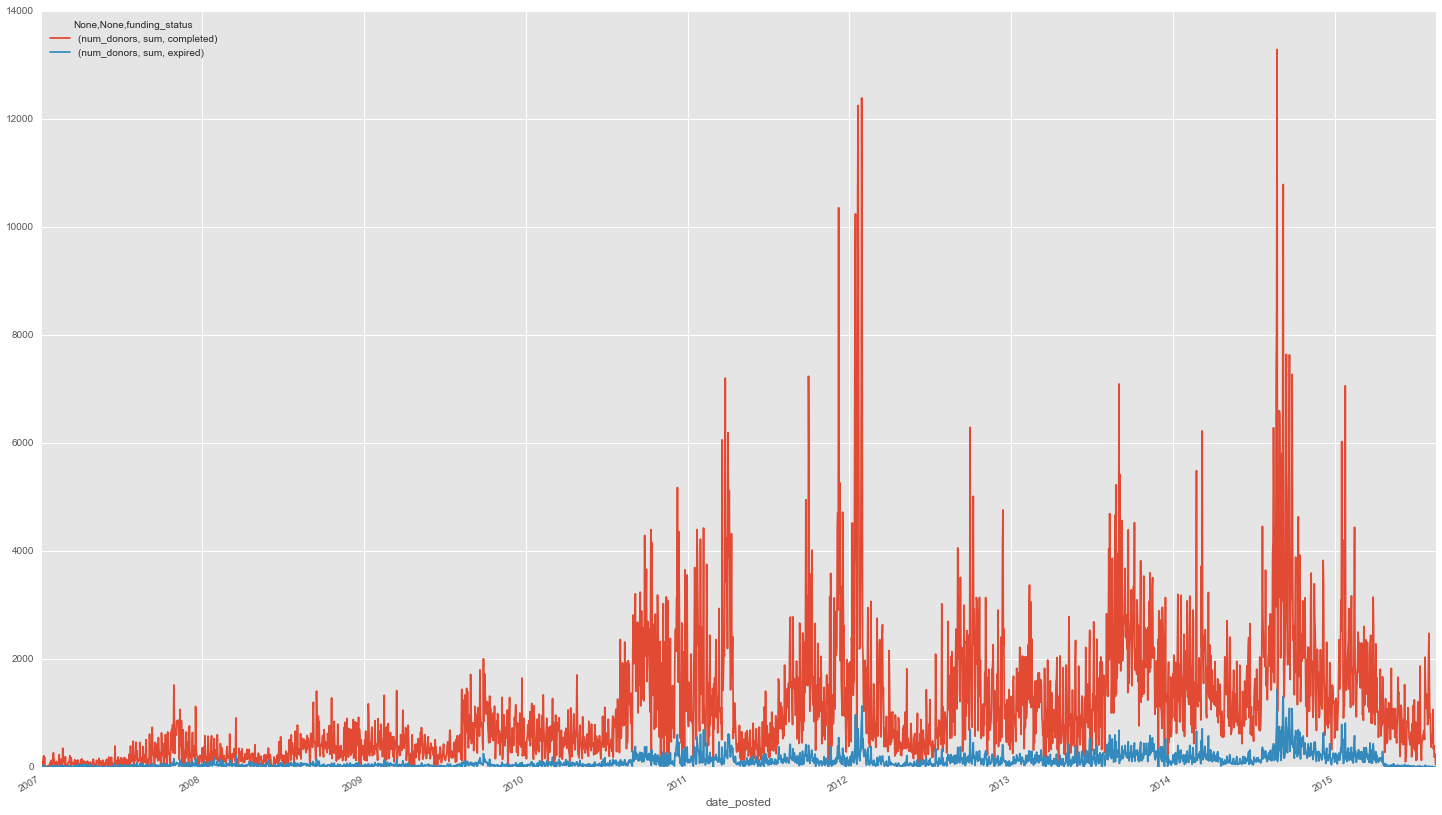

In [23]:
#Slice using datetime string 'YYYYMMDD'
for_plot.loc['20070101':,[('num_donors', 'sum', 'completed'),('num_donors', 'sum', 'expired')]].plot(figsize = (25,15))

In [24]:
#https://www.gatesnotes.com/Education/How-to-Make-a-Teachers-Day-DonorsChoose?cid=GF_IO_BDC4_082200
for_plot.sort(('num_donors','count_nonzero','completed'), ascending=False).head()

num_donors                                            
               count_nonzero               sum            median        
funding_status     completed expired completed expired completed expired
date_posted                                                             
2014-08-24              2342     492     13292    1438         4       1
2014-09-07              1887     458     10788    1308         4       1
2014-09-06              1881     454      8823    1207         3       0
2014-09-04              1572     282      5812     745         2       0
2014-08-23              1485     239      8136     773         4       1

In [25]:
for_plot_rolling_mean = pd.rolling_mean(for_plot.loc['20070101':], window = 5)

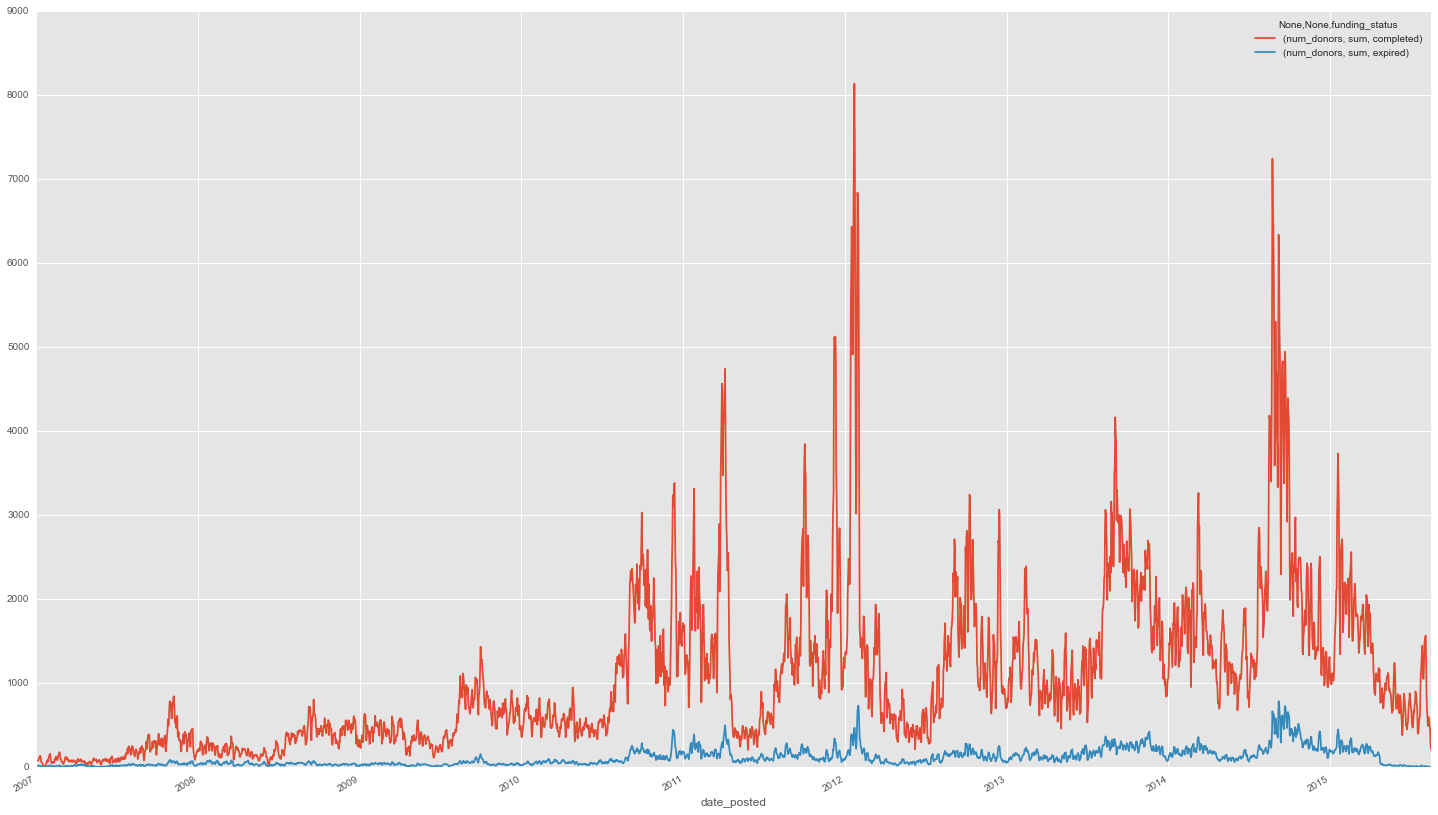

In [26]:
for_plot_rolling_mean.loc[:,[('num_donors', 'sum', 'completed'),('num_donors', 'sum', 'expired')]].plot(figsize = (25,15))

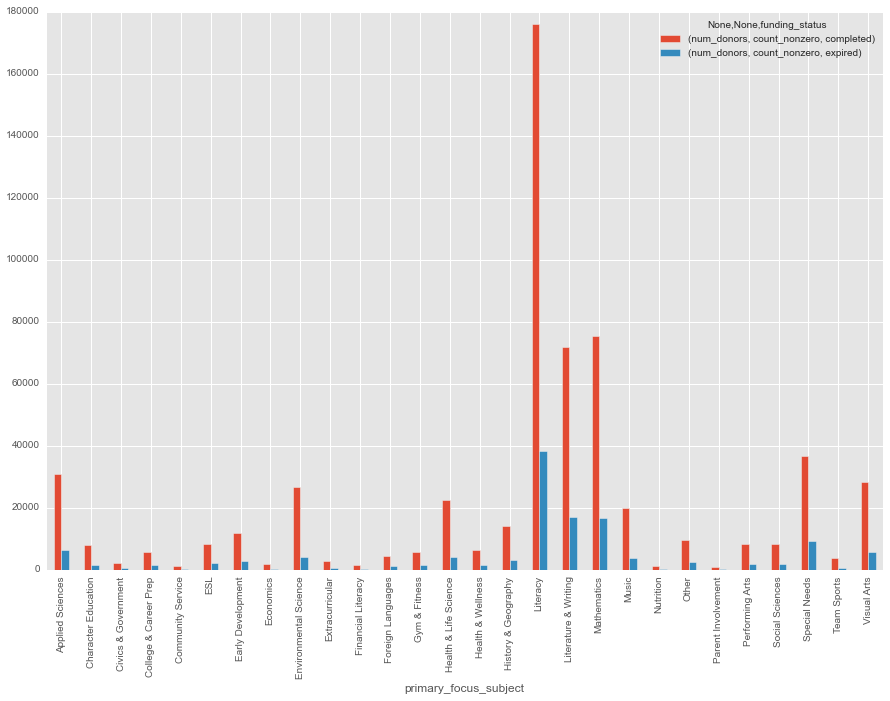

In [27]:
p = projects.groupby(['primary_focus_subject','funding_status']).agg({'num_donors':[np.count_nonzero]}).unstack().fillna(0)
p.plot(kind = 'bar', figsize=(15,10))

In [28]:
p['Total'] = p.iloc[:,0] + p.iloc[:,1]
p['Completed Over Total'] = p.iloc[:,0]/ (p.iloc[:,0] + p.iloc[:,1]).astype('float')
p.sort('Completed Over Total', ascending=False)

num_donors           Total Completed Over Total
                      count_nonzero                                     
funding_status            completed expired                             
primary_focus_subject                                                   
Financial Literacy             1366     129    1495             0.913712
Economics                      1876     257    2133             0.879512
Nutrition                      1044     157    1201             0.869276
Environmental Science         26628    4078   30706             0.867192
Team Sports                    3599     631    4230             0.850827
Health & Life Science         22275    4032   26307             0.846733
Character Education            7939    1509    9448             0.840284
Music                         19881    3784   23665             0.840101
Community Service              1234     236    1470             0.839456
Visual Arts                   28076    5552   33628             0.834899
Social Sciences                8103    1669    9772             0.829206
Applied Sciences              30673    6355   37028             0.828373
Extracurricular                2628     545    3173             0.828238
Civics & Government            2184     458    2642             0.826646
Performing Arts                8192    1735    9927             0.825224
History & Geography           14182    3060   17242             0.822526
Literacy                     176061   38256  214317             0.821498
Mathematics                   75402   16739   92141             0.818333
Health & Wellness              6325    1414    7739             0.817289
Literature & Writing          71819   17096   88915             0.807726
ESL                            8147    1974   10121             0.804960
Early Development             11794    2881   14675             0.803680
Special Needs                 36574    9242   45816             0.798280
Other                          9443    2520   11963             0.789350
Gym & Fitness                  5807    1583    7390             0.785792
College & Career Prep          5577    1521    7098             0.785714
Foreign Languages              4411    1207    5618             0.785155
Parent Involvement              842     246    1088             0.773897

In [29]:
p.sort('Total', ascending=False)

num_donors           Total Completed Over Total
                      count_nonzero                                     
funding_status            completed expired                             
primary_focus_subject                                                   
Literacy                     176061   38256  214317             0.821498
Mathematics                   75402   16739   92141             0.818333
Literature & Writing          71819   17096   88915             0.807726
Special Needs                 36574    9242   45816             0.798280
Applied Sciences              30673    6355   37028             0.828373
Visual Arts                   28076    5552   33628             0.834899
Environmental Science         26628    4078   30706             0.867192
Health & Life Science         22275    4032   26307             0.846733
Music                         19881    3784   23665             0.840101
History & Geography           14182    3060   17242             0.822526
Early Development             11794    2881   14675             0.803680
Other                          9443    2520   11963             0.789350
ESL                            8147    1974   10121             0.804960
Performing Arts                8192    1735    9927             0.825224
Social Sciences                8103    1669    9772             0.829206
Character Education            7939    1509    9448             0.840284
Health & Wellness              6325    1414    7739             0.817289
Gym & Fitness                  5807    1583    7390             0.785792
College & Career Prep          5577    1521    7098             0.785714
Foreign Languages              4411    1207    5618             0.785155
Team Sports                    3599     631    4230             0.850827
Extracurricular                2628     545    3173             0.828238
Civics & Government            2184     458    2642             0.826646
Economics                      1876     257    2133             0.879512
Financial Literacy             1366     129    1495             0.913712
Community Service              1234     236    1470             0.839456
Nutrition                      1044     157    1201             0.869276
Parent Involvement              842     246    1088             0.773897

In [30]:
projects.columns

Index([u'_teacher_acctid', u'_schoolid', u'school_ncesid', u'school_latitude',
       u'school_longitude', u'school_city', u'school_state', u'school_zip',
       u'school_metro', u'school_district', u'school_county',
       u'school_charter', u'school_magnet', u'school_year_round',
       u'school_nlns', u'school_kipp', u'school_charter_ready_promise',
       u'teacher_prefix', u'teacher_teach_for_america',
       u'teacher_ny_teaching_fellow', u'primary_focus_subject',
       u'primary_focus_area', u'secondary_focus_subject',
       u'secondary_focus_area', u'resource_type', u'poverty_level',
       u'grade_level', u'vendor_shipping_charges', u'sales_tax',
       u'payment_processing_charges', u'fulfillment_labor_materials',
       u'total_price_excluding_optional_support',
       u'total_price_including_optional_support', u'students_reached',
       u'total_donations', u'num_donors', u'eligible_double_your_impact_match',
       u'eligible_almost_home_match', u'funding_status', u'date

#Additional Questions:

Where are the majority of schools?
Where are the majority of donors?
Do donors typically donate to a school in their state?
What types of projects do people request in their state? (Normliaze to %)

When are the majority of projects posted?

Who are the top donors? and how much do they contribute?
Distribution of the number of times a donor has donated?

Do wealtherier schools request different things?

Predicting donors churn? based on... whether the project was completed? Objective? 1 year return?
Further explain the groups produced by the NMF?

#NEED TO JOIN WITH ZIPCODE DATA
Do wealthier neighborhoods get more donations?

Query using API For top donor information?
Probability of being funded if previously funded or probability of being funded if first attempt

Avg request by project type

In [31]:
# #Test to see if first projects are more likely to be funded **Very Slow
# previous_teacher_ids = set()
# for indx, r in projects.iterrows():
#     if r['_teacher_acctid'] in previous_teacher_ids:
#         projects.loc[indx, 'is_First_Project'] = 0
#     previous_teacher_ids.add(r['_teacher_acctid'])
#projects.drop('is_First_Project', axis = 1 ,inplace = True)

In [32]:
projects['Project_Number'] = projects.groupby('_teacher_acctid').cumcount()

In [33]:
projects.loc[:,['_teacher_acctid', 'Project_Number']].head()

,_teacher_acctid,Project_Number
_projectid,,
7342bd01a2a7725ce033a179d22e382d,5c43ef5eac0f5857c266baa1ccfa3d3f,0
b56b502d25666e29550d107bf7e17910,57426949b47700ccf62098e1e9b0220c,0
3a88a47f97bd0c9b7c6a745bcd831ce3,7a20087fac86232883537cab45c0a6c9,0
0b8a4f8eb1822ab6dd5cd9ffb918ece3,e5d28482308e2007992ae8b358b31bce,0
45235cb116b3b35cd86d1c3a63961d7d,214d75bd0e6ce3e7085278ddd8f26daa,0


(0, 25)

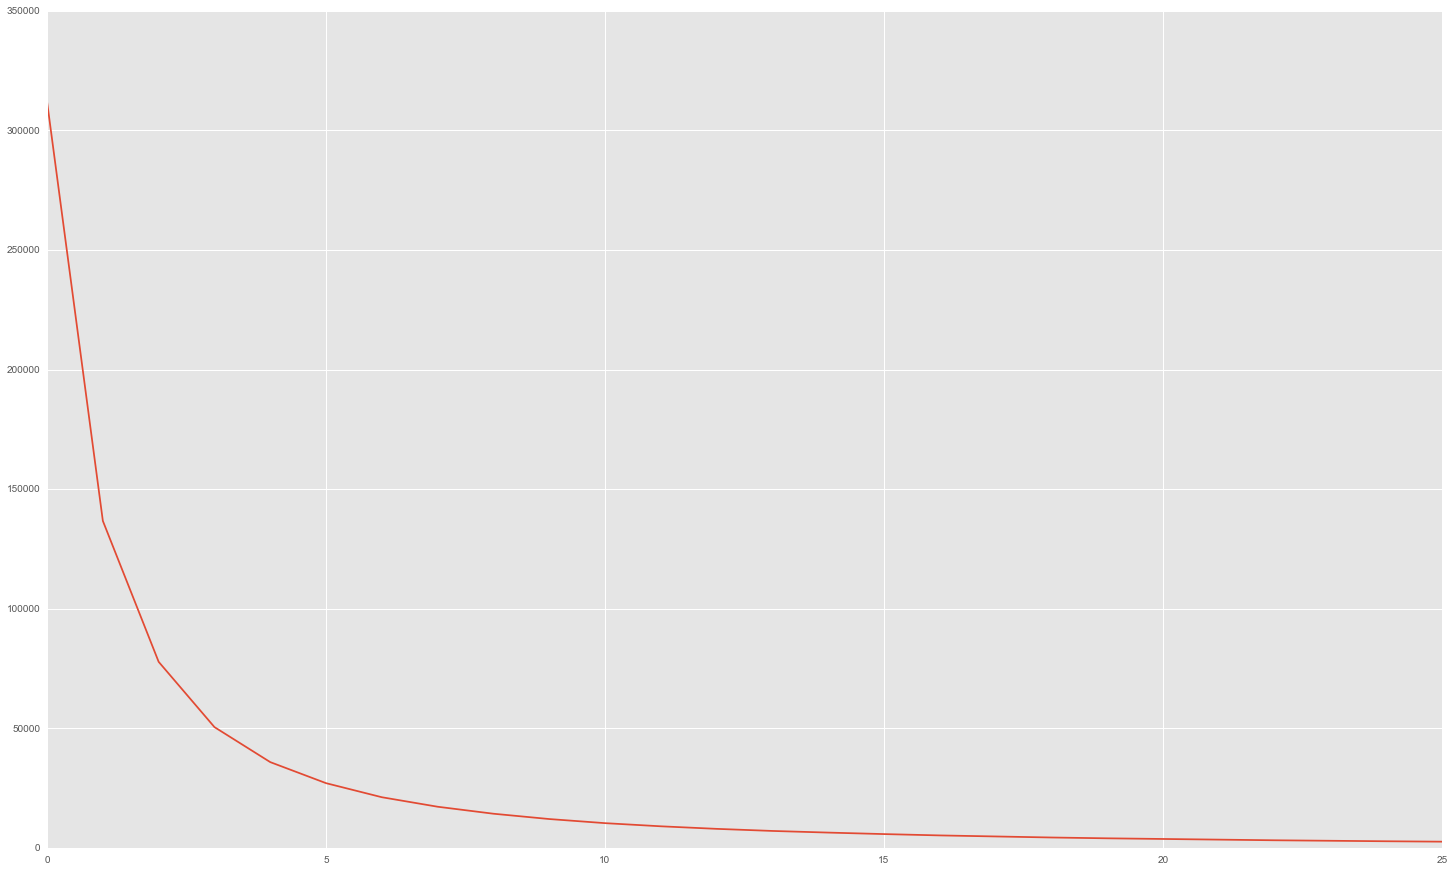

In [48]:
projects.Project_Number.value_counts().plot(figsize = (25,15))
plt.xlim((0,25))

In [49]:
projects.Project_Number.value_counts().head(15)/projects.shape[0]

0     0.368700
1     0.161541
2     0.091905
3     0.059646
4     0.042344
5     0.031941
6     0.024990
7     0.020294
8     0.016838
9     0.014214
10    0.012181
11    0.010626
12    0.009362
13    0.008329
14    0.007516
dtype: float64

In [1]:
#for_plot.plot(alpha = .5, figsize = (25,15))

In [52]:
projects['is_First_Project'] =  projects.Project_Number == 0

In [ ]:
projects.groupby([])

In [ ]:
for c in projects.columns:
    if projects[c].dtype == 'object':
        if projects[c].nunique() < 51:
            print c
            projects[c].value_counts().plot(kind  = 'bar', alpha = .4)
            plt.show()

In [ ]:
#Sentiment analysis?

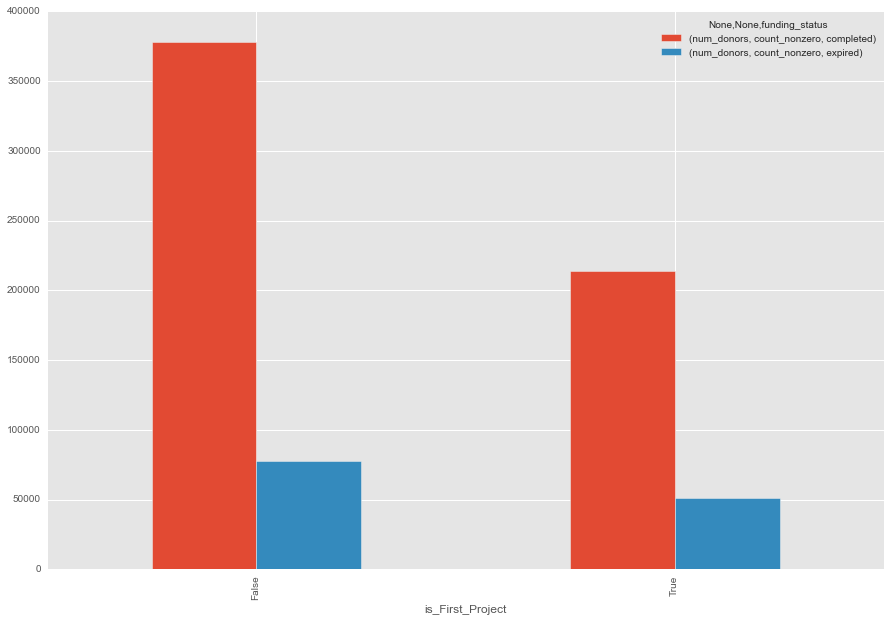

In [53]:
p = projects.groupby(['is_First_Project','funding_status']).agg({'num_donors':[np.count_nonzero]}).unstack().fillna(0)
p.plot(kind = 'bar', figsize=(15,10))

In [59]:
p/float(projects.shape[0])

num_donors          
                 count_nonzero          
funding_status       completed   expired
is_First_Project                        
False                 0.446646  0.092203
True                  0.253103  0.060102